In [42]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('/content/DM2425_ABCDEats_DATASET (1).csv',delimiter=',')

In [4]:
df.head()

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
0,1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,...,0,0,0,0,2,0,0,0,0,0
1,5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,...,0,0,0,0,0,0,0,0,0,0
2,f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,...,0,0,0,0,0,0,0,0,0,0
3,180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,...,1,0,0,0,0,0,0,0,0,0
4,4eb37a6705,4660,20.0,2,5,0,0.0,2,-,DIGI,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31888 entries, 0 to 31887
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               31888 non-null  object 
 1   customer_region           31888 non-null  object 
 2   customer_age              31161 non-null  float64
 3   vendor_count              31888 non-null  int64  
 4   product_count             31888 non-null  int64  
 5   is_chain                  31888 non-null  int64  
 6   first_order               31782 non-null  float64
 7   last_order                31888 non-null  int64  
 8   last_promo                31888 non-null  object 
 9   payment_method            31888 non-null  object 
 10  CUI_American              31888 non-null  float64
 11  CUI_Asian                 31888 non-null  float64
 12  CUI_Beverages             31888 non-null  float64
 13  CUI_Cafe                  31888 non-null  float64
 14  CUI_Ch

In [6]:
df.describe()

,customer_age,vendor_count,product_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
count,31161.000000,31888.000000,31888.000000,31888.000000,31782.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,...,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000
mean,27.506499,3.102609,5.668245,2.818866,28.478604,63.675521,4.880438,9.960451,2.300633,0.801163,...,0.215630,0.277032,0.356435,0.390962,0.336961,0.245610,0.142812,0.071155,0.048263,0.045189
std,7.160898,2.771587,6.957287,3.977529,24.109086,23.226123,11.654018,23.564351,8.479734,6.427132,...,0.599006,0.738162,0.874449,0.943721,0.893949,0.795296,0.586529,0.348536,0.298265,0.282006
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,1.000000,2.000000,1.000000,7.000000,49.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,2.000000,3.000000,2.000000,22.000000,70.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,31.000000,4.000000,7.000000,3.000000,45.000000,83.000000,5.660000,11.830000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,80.000000,41.000000,269.000000,83.000000,90.000000,90.000000,280.210000,896.710000,229.220000,326.100000,...,13.000000,23.000000,22.000000,20.000000,24.000000,35.000000,36.000000,11.000000,15.000000,13.000000


In [7]:
df.describe(include=['object'])

,customer_id,customer_region,last_promo,payment_method
count,31888,31888,31888,31888
unique,31875,9,4,3
top,742ca068fc,8670,-,CARD
freq,2,9761,16748,20161


### Vamos averiguar a situação dos duplicados

In [8]:
print(df.drop_duplicates())

      customer_id customer_region  customer_age  vendor_count  product_count  \
0      1b8f824d5e            2360          18.0             2              5   
1      5d272b9dcb            8670          17.0             2              2   
2      f6d1b2ba63            4660          38.0             1              2   
3      180c632ed8            4660           NaN             2              3   
4      4eb37a6705            4660          20.0             2              5   
...           ...             ...           ...           ...            ...   
31883  f4e366c281            8670          30.0             1              1   
31884  f6b6709018            8670           NaN             1              1   
31885  f74ad8ce3f            8670          24.0             1              1   
31886  f7b19c0241            8670          34.0             1              1   
31887  fd40d3b0e0            4660          30.0             1              1   

       is_chain  first_order  last_orde

In [9]:
df.duplicated().sum()

13

In [10]:
df=df.drop_duplicates()
df.duplicated().sum()

0

## Vamos averiguar a situação dos missing values

In [14]:
(df.isna().mean()*100).sort_values(ascending=False)

,0
HR_0,3.651765
customer_age,2.280784
first_order,0.332549
customer_id,0.000000
HR_10,0.000000
DOW_6,0.000000
HR_1,0.000000
HR_2,0.000000
HR_3,0.000000
HR_4,0.000000


# Vamos analisar a variável age

Vamos tratar a idade como uma variável categórica, pois traz-nos uma análise mais simplificada para o problema


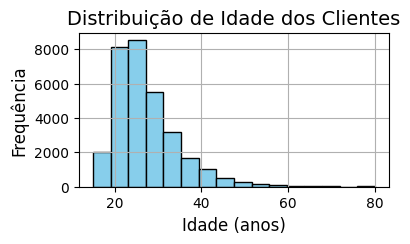

In [18]:
plt.figure(figsize=(4,2))
plt.hist(df['customer_age'], bins=16, color='skyblue', edgecolor='black')
plt.title('Distribuição de Idade dos Clientes', fontsize=14)
plt.xlabel('Idade (anos)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(True)
plt.show()

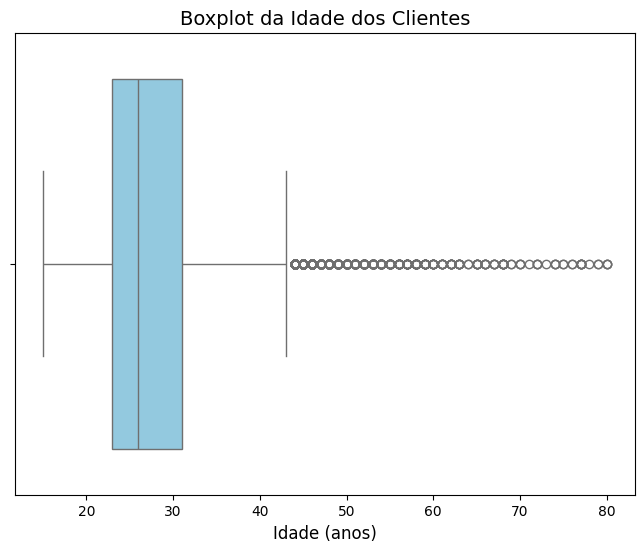

In [19]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df['customer_age'], color='skyblue')
plt.title('Boxplot da Idade dos Clientes', fontsize=14)
plt.xlabel('Idade (anos)', fontsize=12)
plt.show()

Podemos observar pelo boxplot e histograma que a variável possuium bom número de outliers. Esta é assimétrica positiva o que no seeu contexto quererá dizer que os clientes deste serviço são predominantemente pessoas jovem entre os 20 e os 30.

Existe outro problema que temos de tratar que são os missing values desta variável que são cerca de 3,65% da mesma. Devido à multidimensionalidade desta base de dados e da sua dimensão decidimos utilizar o KNN para preencher estes missing values.

In [49]:
metric_features = df.select_dtypes(include='number')
imputer = KNNImputer(n_neighbors=5, weights="uniform")
features_for_imputation = df[metric_features.columns].copy()
imputed_values = imputer.fit_transform(features_for_imputation)
df['customer_age'] = imputed_values[:, features_for_imputation.columns.get_loc('customer_age')]
print(df['customer_age'].isna().sum())


0


,0
HR_0,3.651765
first_order,0.332549
customer_id,0.000000
HR_10,0.000000
DOW_6,0.000000
HR_1,0.000000
HR_2,0.000000
HR_3,0.000000
HR_4,0.000000
HR_5,0.000000


# Vamos analisar a variável customer_region

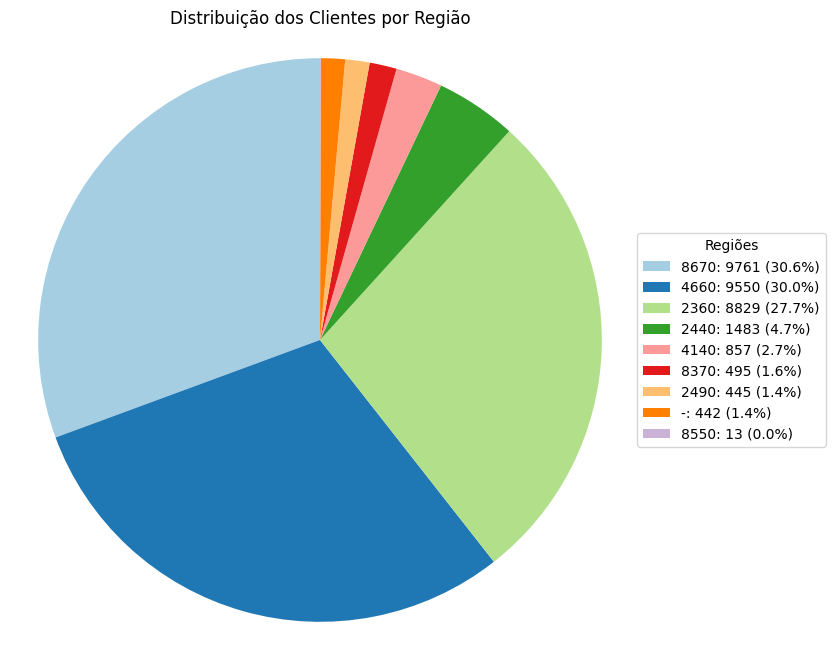

In [22]:
# Filtrar os valores válidos (não-NA) para a coluna 'customer_region'
region_counts = df['customer_region'].value_counts(dropna=True)

# Definir cores (uma cor diferente para cada região)
colors = plt.cm.Paired(range(len(region_counts)))

# Criar o gráfico de pizza sem percentagens no gráfico
plt.figure(figsize=(8, 8))
wedges, texts = plt.pie(region_counts, startangle=90, colors=colors)

# Adicionar a percentagem na legenda
legend_labels = [f'{region}: {count} ({100 * count / sum(region_counts):.1f}%)' for region, count in zip(region_counts.index, region_counts)]

# Configurar a legenda com nomes das regiões e percentagens
plt.legend(wedges, legend_labels, title="Regiões", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Configurações adicionais
plt.title("Distribuição dos Clientes por Região")
plt.axis('equal')  # Assegurar que o gráfico seja desenhado como um círculo

# Mostrar o gráfico
plt.show()

# Vamos analisar a variável vendor_count

> Adicionar blockquote



In [30]:
vendor_count_series = df['vendor_count'].value_counts().sort_index()
print(vendor_count_series)

vendor_count
0      138
1     9059
2     8547
3     5173
4     2984
5     1875
6     1166
7      816
8      594
9      396
10     285
11     219
12     146
13     108
14     101
15      62
16      41
17      34
18      26
19      20
20      22
21       9
22       7
23      12
24       6
25       6
26       2
27       5
28       3
29       2
30       3
31       1
32       2
34       2
35       1
40       1
41       1
Name: count, dtype: int64


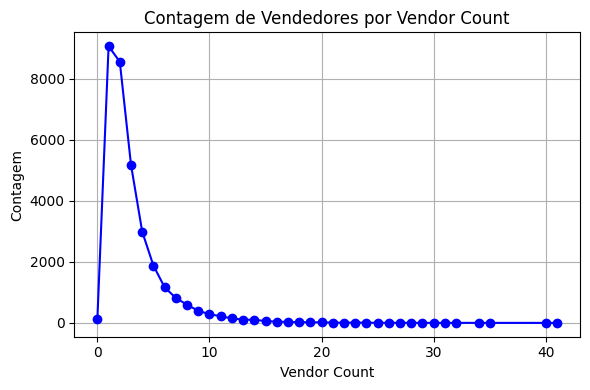

In [34]:
plt.figure(figsize=(6, 4))
plt.plot(vendor_count_series.index, vendor_count_series.values, marker='o', linestyle='-', color='b')  # 'b' para azul

# Configurações do gráfico
plt.title('Contagem de Vendedores por Vendor Count')
plt.xlabel('Vendor Count')
plt.ylabel('Contagem')
plt.grid(True)

# Mostrar o gráfico
plt.tight_layout()  # Ajustar o layout
plt.show()

# Vamos analisar a variável product_count

In [35]:
product_count_series = df['product_count'].value_counts().sort_index()
print(product_count_series)

product_count
0       156
1      4690
2      6282
3      4970
4      3404
       ... 
97        1
109       1
110       1
117       1
269       1
Name: count, Length: 93, dtype: int64


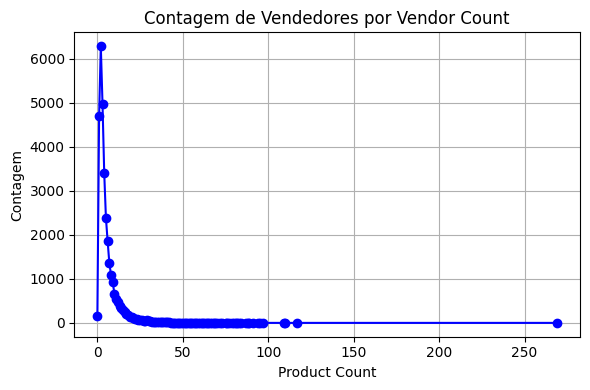

In [36]:
plt.figure(figsize=(6, 4))
plt.plot(product_count_series.index, product_count_series.values, marker='o', linestyle='-', color='b')
plt.title('Contagem de Vendedores por Vendor Count')
plt.xlabel('Product Count')
plt.ylabel('Contagem')
plt.grid(True)
plt.tight_layout()
plt.show()

# Vamos analisar as variáveis first_order e last_order

> Adicionar blockquote



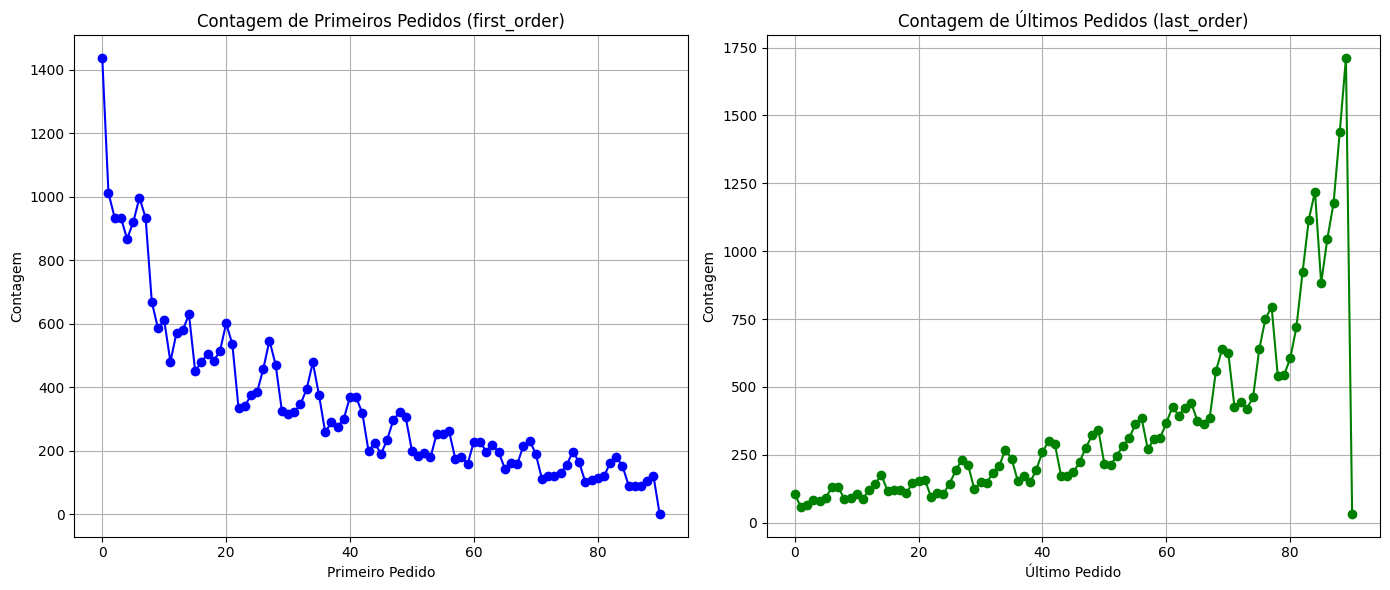

In [37]:
first_order_counts = df['first_order'].value_counts().sort_index()
last_order_counts = df['last_order'].value_counts().sort_index()

# Criar a figura e os eixos para os subgráficos
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico para 'first_order'
axs[0].plot(first_order_counts.index, first_order_counts.values, marker='o', linestyle='-', color='b')
axs[0].set_title('Contagem de Primeiros Pedidos (first_order)')
axs[0].set_xlabel('Primeiro Pedido')
axs[0].set_ylabel('Contagem')
axs[0].grid(True)

# Gráfico para 'last_order'
axs[1].plot(last_order_counts.index, last_order_counts.values, marker='o', linestyle='-', color='g')
axs[1].set_title('Contagem de Últimos Pedidos (last_order)')
axs[1].set_xlabel('Último Pedido')
axs[1].set_ylabel('Contagem')
axs[1].grid(True)

# Ajustar layout e mostrar os gráficos
plt.tight_layout()
plt.show()

# Vamos analisar a variável last_promo


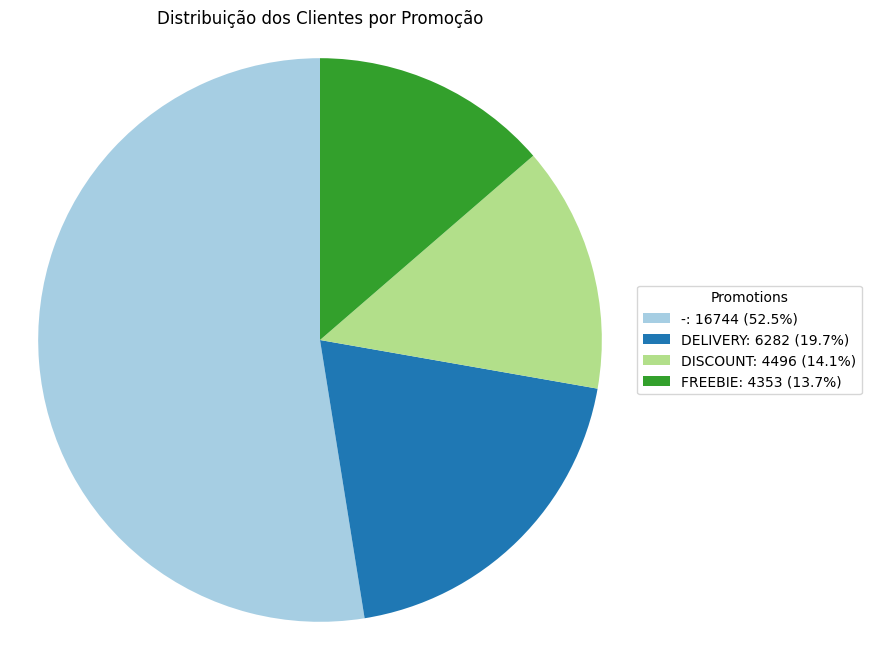

In [38]:
# Filtrar os valores válidos (não-NA) para a coluna 'customer_region'
region_counts = df['last_promo'].value_counts(dropna=True)

# Definir cores (uma cor diferente para cada região)
colors = plt.cm.Paired(range(len(region_counts)))

# Criar o gráfico de pizza sem percentagens no gráfico
plt.figure(figsize=(8, 8))
wedges, texts = plt.pie(region_counts, startangle=90, colors=colors)

# Adicionar a percentagem na legenda
legend_labels = [f'{region}: {count} ({100 * count / sum(region_counts):.1f}%)' for region, count in zip(region_counts.index, region_counts)]

# Configurar a legenda com nomes das regiões e percentagens
plt.legend(wedges, legend_labels, title="Promotions", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Configurações adicionais
plt.title("Distribuição dos Clientes por Promoção")
plt.axis('equal')  # Assegurar que o gráfico seja desenhado como um círculo

# Mostrar o gráfico
plt.show()

# Vamos analisar a variável payment_method

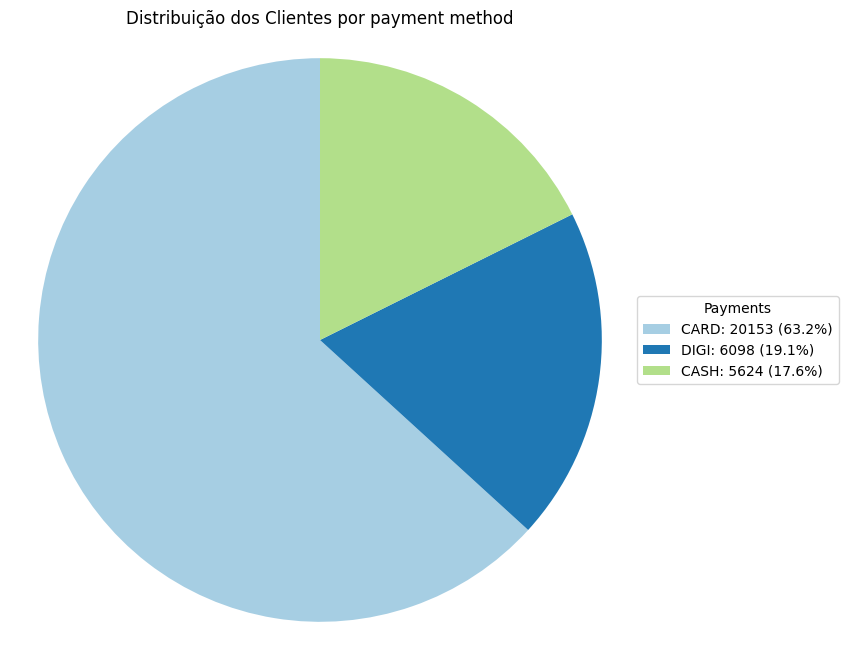

In [40]:
# Filtrar os valores válidos (não-NA) para a coluna 'customer_region'
region_counts = df['payment_method'].value_counts(dropna=True)

# Definir cores (uma cor diferente para cada região)
colors = plt.cm.Paired(range(len(region_counts)))

# Criar o gráfico de pizza sem percentagens no gráfico
plt.figure(figsize=(8, 8))
wedges, texts = plt.pie(region_counts, startangle=90, colors=colors)

# Adicionar a percentagem na legenda
legend_labels = [f'{region}: {count} ({100 * count / sum(region_counts):.1f}%)' for region, count in zip(region_counts.index, region_counts)]

# Configurar a legenda com nomes das regiões e percentagens
plt.legend(wedges, legend_labels, title="Payments", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Configurações adicionais
plt.title("Distribuição dos Clientes por payment method")
plt.axis('equal')  # Assegurar que o gráfico seja desenhado como um círculo

# Mostrar o gráfico
plt.show()

# Vamos analisar as variáveis CUI`s

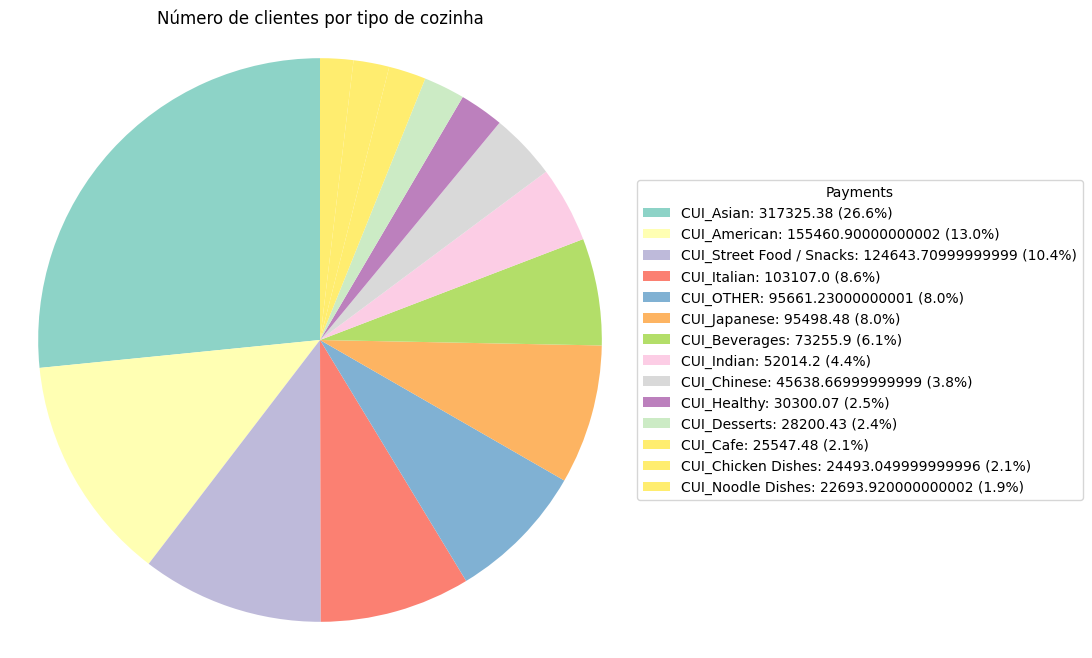

In [57]:
sums_types=df[['CUI_American','CUI_Asian','CUI_Beverages','CUI_Cafe','CUI_Chicken Dishes','CUI_Chinese','CUI_Desserts','CUI_Healthy','CUI_Indian','CUI_Italian','CUI_Japanese','CUI_Noodle Dishes','CUI_OTHER','CUI_Street Food / Snacks']].sum().sort_values(ascending=False)
# Definir cores (uma cor diferente para cada região)
colors = plt.cm.Set3(range(len(sums_types)))

# Criar o gráfico de pizza sem percentagens no gráfico
plt.figure(figsize=(8, 8))
wedges, texts = plt.pie(sums_types, startangle=90, colors=colors)

# Adicionar a percentagem na legenda
legend_labels = [f'{region}: {count} ({100 * count / sum(sums_types):.1f}%)' for region, count in zip(sums_types.index, sums_types)]

# Configurar a legenda com nomes das regiões e percentagens
plt.legend(wedges, legend_labels, title="Payments", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Configurações adicionais
plt.title("Número de clientes por tipo de cozinha")
plt.axis('equal')  # Assegurar que o gráfico seja desenhado como um círculo

# Mostrar o gráfico
plt.show()